# Wind Turbine Analytics
Data Analytics and Classification Model for Failure Detection of Wind Turbine from IIoT Data

[](wtech-Adion.jpg)
[Image Source](https://www.windpowermonthly.com/article/1594597/windtech-new-hybrid-gearbox-splits-loads-scalability)

In [1]:
# Importing important Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder, LabelBinarizer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#  for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc

# models
from sklearn import tree

# Loading & Reading Dataset

In [2]:
df = pd.read_csv('pred_maint_wind.csv')
df.head()

,DateTime,Time,Error,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev
0,5/1/2014 0:00,1398920448,0,6.9,9.4,2.9,0.0,0.02,0.0,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
1,5/1/2014 0:09,1398920960,0,5.3,8.9,1.6,0.0,0.01,0.0,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
2,5/1/2014 0:20,1398921600,0,5.0,9.5,1.4,0.0,0.04,0.0,0,...,24,20,25,12,14,24,34,2501,25.272728,1.103713
3,5/1/2014 0:30,1398922240,0,4.4,8.3,1.3,0.0,0.08,0.0,0,...,23,21,25,12,14,24,34,2501,25.272728,1.103713
4,5/1/2014 0:39,1398922752,0,5.7,9.7,1.2,0.0,0.05,0.0,0,...,23,21,25,12,14,23,34,2501,25.272728,1.103713


In [3]:
df.info

<bound method DataFrame.info of              DateTime        Time  Error  WEC: ava. windspeed  \
0       5/1/2014 0:00  1398920448      0                  6.9   
1       5/1/2014 0:09  1398920960      0                  5.3   
2       5/1/2014 0:20  1398921600      0                  5.0   
3       5/1/2014 0:30  1398922240      0                  4.4   
4       5/1/2014 0:39  1398922752      0                  5.7   
...               ...         ...    ...                  ...   
49022  4/8/2015 23:20  1428553216      0                  3.9   
49023  4/8/2015 23:30  1428553856      0                  3.9   
49024  4/8/2015 23:39  1428554368      0                  4.2   
49025  4/8/2015 23:50  1428555008      0                  4.1   
49026   4/9/2015 0:00  1428555648      0                  4.8   

       WEC: max. windspeed  WEC: min. windspeed  WEC: ava. Rotation  \
0                      9.4                  2.9                0.00   
1                      8.9                  1

In [4]:
df.shape

(49027, 66)

In [5]:
df.describe()

,Time,Error,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev
count,4.902700e+04,49027.000000,49027.000000,49027.000000,49027.000000,49027.00000,49027.000000,49027.000000,49027.000000,49027.000000,...,49027.000000,49027.000000,49027.000000,49027.000000,49027.000000,49027.000000,49027.000000,49027.000000,49027.000000,49027.000000
mean,1.413762e+09,0.938748,6.874626,9.340286,12.244133,8.67852,9.547354,8.515034,942.261244,1214.015400,...,30.335958,24.320211,28.802456,13.380219,23.116303,31.766537,43.992596,2988.628184,27.828410,1.855781
std,8.559693e+06,14.442141,3.694776,5.157448,223.186866,4.14345,4.482192,22.394531,1008.930159,1168.858993,...,5.623608,4.918045,5.185007,5.246230,6.360604,6.381892,10.404843,172.074485,5.595795,1.269928
min,1.398920e+09,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,-14.000000,0.000000
25%,1.406352e+09,0.000000,4.200000,5.800000,2.600000,6.33000,6.740000,5.880000,87.000000,138.000000,...,26.000000,20.000000,25.000000,9.000000,19.000000,27.000000,37.000000,3050.000000,24.363636,1.206045
50%,1.413706e+09,0.000000,6.500000,8.600000,4.400000,8.97000,10.060000,7.850000,536.000000,802.000000,...,30.000000,25.000000,29.000000,13.000000,24.000000,33.000000,43.000000,3050.000000,28.454546,1.566699
75%,1.421179e+09,0.000000,8.900000,11.700000,6.300000,11.92000,13.550000,10.390000,1551.000000,2326.000000,...,34.000000,28.000000,33.000000,17.000000,28.000000,36.000000,48.000000,3050.000000,31.818182,2.370270
max,1.428556e+09,246.000000,32.099998,51.099998,6553.500000,14.73000,18.910000,655.349976,3071.000000,3216.000000,...,49.000000,38.000000,44.000000,35.000000,36.000000,45.000000,71.000000,3050.000000,42.545456,23.512859


In [6]:
df.dtypes

DateTime                  object
Time                       int64
Error                      int64
WEC: ava. windspeed      float64
WEC: max. windspeed      float64
                          ...   
Control cabinet temp.      int64
Transformer temp.          int64
RTU: ava. Setpoint 1       int64
Inverter averages        float64
Inverter std dev         float64
Length: 66, dtype: object

In [7]:
df.columns

Index(['DateTime', 'Time', 'Error', 'WEC: ava. windspeed',
       'WEC: max. windspeed', 'WEC: min. windspeed', 'WEC: ava. Rotation',
       'WEC: max. Rotation', 'WEC: min. Rotation', 'WEC: ava. Power',
       'WEC: max. Power', 'WEC: min. Power',
       'WEC: ava. Nacel position including cable twisting',
       'WEC: Operating Hours', 'WEC: Production kWh',
       'WEC: Production minutes', 'WEC: ava. reactive Power',
       'WEC: max. reactive Power', 'WEC: min. reactive Power',
       'WEC: ava. available P from wind',
       'WEC: ava. available P technical reasons',
       'WEC: ava. Available P force majeure reasons',
       'WEC: ava. Available P force external reasons',
       'WEC: ava. blade angle A', 'Sys 1 inverter 1 cabinet temp.',
       'Sys 1 inverter 2 cabinet temp.', 'Sys 1 inverter 3 cabinet temp.',
       'Sys 1 inverter 4 cabinet temp.', 'Sys 1 inverter 5 cabinet temp.',
       'Sys 1 inverter 6 cabinet temp.', 'Sys 1 inverter 7 cabinet temp.',
       'Sys 2 inve

In [8]:
# checking for number of unique values in our potential Target Features
df[['Error', 'WEC: Operating Hours', 'WEC: Production kWh', 'WEC: Production minutes', 'WEC: ava. Power']].nunique()

Error                         12
WEC: Operating Hours        7005
WEC: Production kWh        41753
WEC: Production minutes       60
WEC: ava. Power             3067
dtype: int64


 -  Based on unique values, 'Error' is the best target feature for classification with 12 unique categories, 
 ideal for distinguishing different error types in a predictive maintenance context. 
 - 'Operating Hours' and 'Production kWh' have thousands of unique values, making them more suitable 
 for regression rather than classification.
 - 'Production Minutes' and 'ava. Power' could theoretically be classified, but may lose detail and are less informative than 'Error' for this task.


# Explorative Data Analysis 

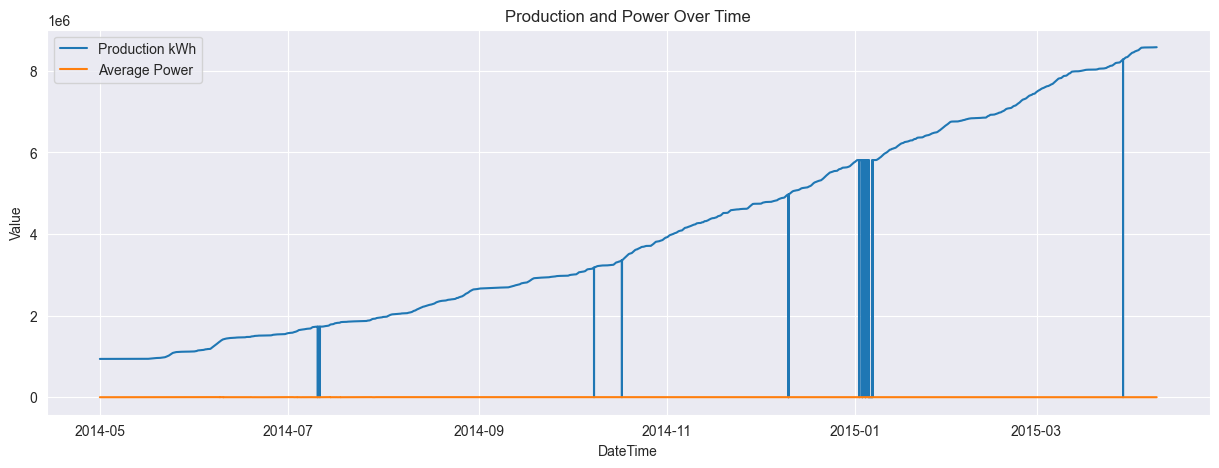

In [9]:
# Converting DateTime column to a datetime object if not already
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Plot production and power over time
plt.figure(figsize=(15, 5))
plt.plot(df['DateTime'], df['WEC: Production kWh'], label='Production kWh')
plt.plot(df['DateTime'], df['WEC: ava. Power'], label='Average Power')
plt.xlabel('DateTime')
plt.ylabel('Value')
plt.title('Production and Power Over Time')
plt.legend()
plt.show()

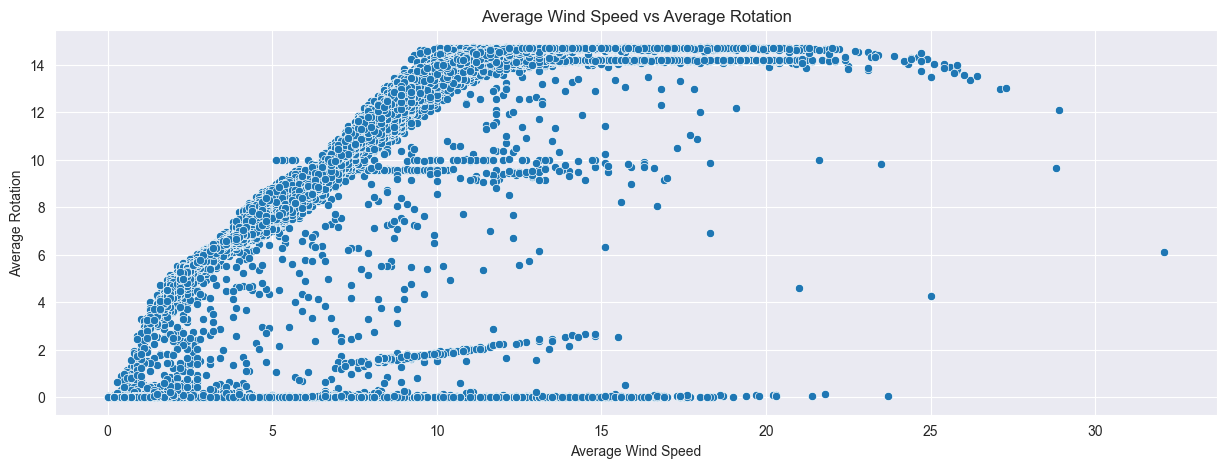

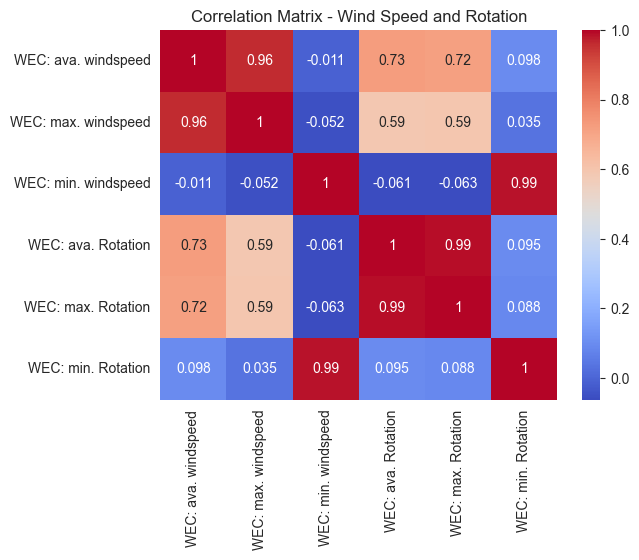

In [10]:
# Scatter plot for average wind speed and average rotation
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df, x='WEC: ava. windspeed', y='WEC: ava. Rotation')
plt.title('Average Wind Speed vs Average Rotation')
plt.xlabel('Average Wind Speed')
plt.ylabel('Average Rotation')
plt.show()

# Correlation matrix for wind and rotation features
wind_rotation_cols = ['WEC: ava. windspeed', 'WEC: max. windspeed', 'WEC: min. windspeed',
                      'WEC: ava. Rotation', 'WEC: max. Rotation', 'WEC: min. Rotation']
sns.heatmap(df[wind_rotation_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Wind Speed and Rotation')
plt.show()

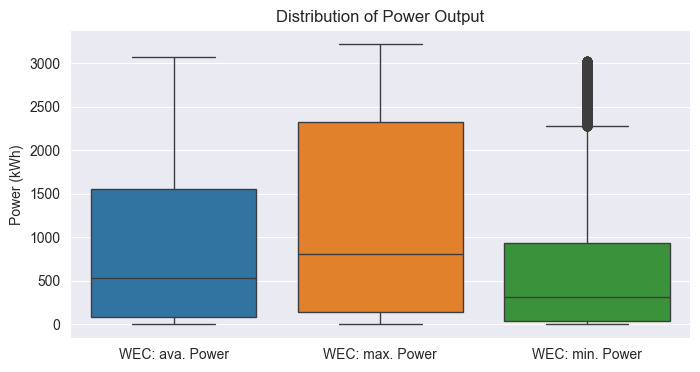

In [11]:
power_cols = ['WEC: ava. Power', 'WEC: max. Power', 'WEC: min. Power']
df[power_cols].describe()

# Box plot to visualize the distribution of power output metrics
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[power_cols])
plt.title('Distribution of Power Output')
plt.ylabel('Power (kWh)')
plt.show()

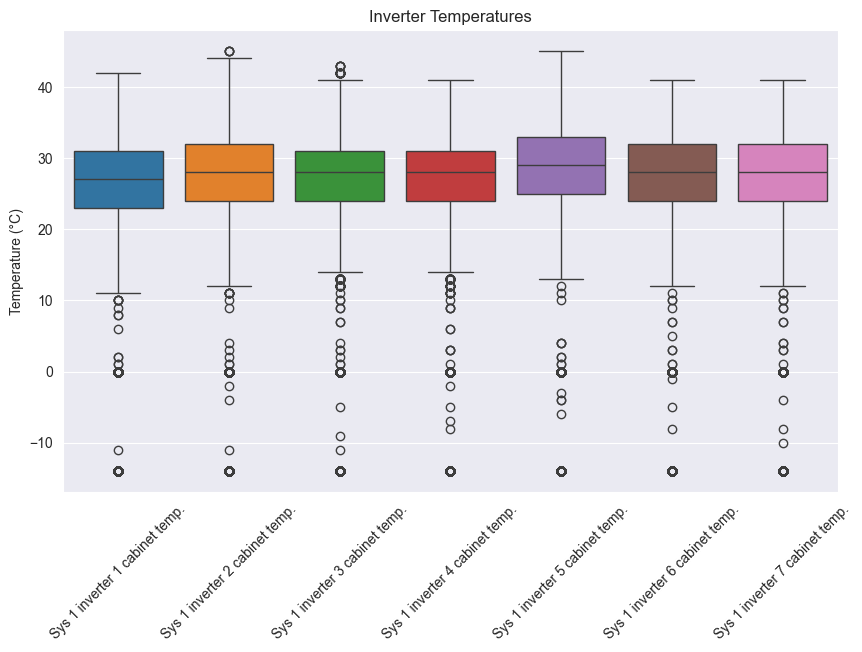

In [24]:
# Plotting inverter temperatures together
inverter_temps = ['Sys 1 inverter 1 cabinet temp.', 'Sys 1 inverter 2 cabinet temp.',
                  'Sys 1 inverter 3 cabinet temp.', 'Sys 1 inverter 4 cabinet temp.',
                  'Sys 1 inverter 5 cabinet temp.', 'Sys 1 inverter 6 cabinet temp.',
                  'Sys 1 inverter 7 cabinet temp.']

# Box plot of inverter temperatures
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[inverter_temps])
plt.xticks(rotation=45)
plt.title('Inverter Temperatures')
plt.ylabel('Temperature (°C)')
plt.show()

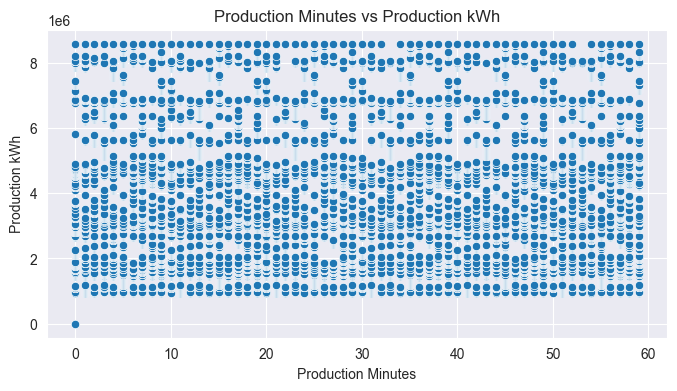

In [21]:
# Scatter plot of Production minutes vs Production kWh
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='WEC: Production minutes', y='WEC: Production kWh')
plt.title('Production Minutes vs Production kWh')
plt.xlabel('Production Minutes')
plt.ylabel('Production kWh')
plt.show()

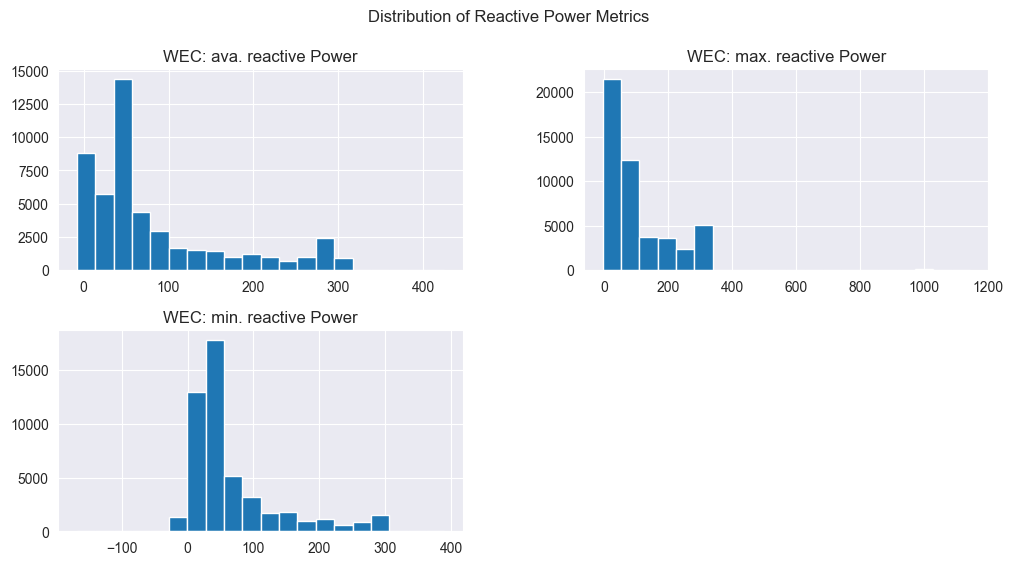

In [20]:
reactive_power_cols = ['WEC: ava. reactive Power', 'WEC: max. reactive Power', 'WEC: min. reactive Power']

# Histogram of reactive power metrics
df[reactive_power_cols].hist(bins=20, figsize=(12, 6))
plt.suptitle('Distribution of Reactive Power Metrics')
plt.show()

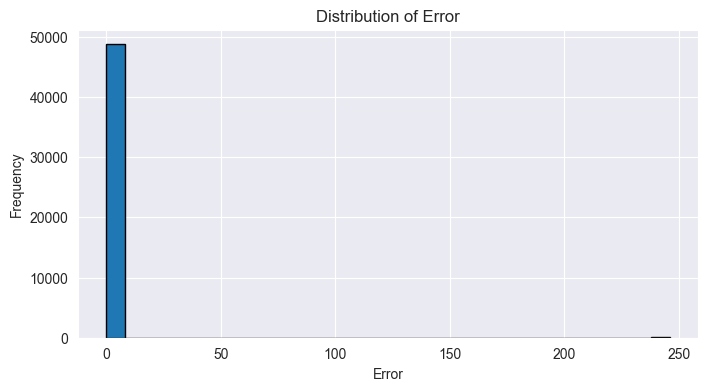

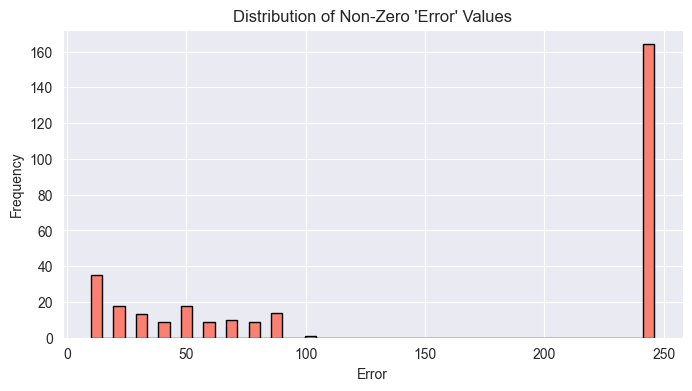

In [18]:
# Plot a histogram of the 'Error' column
plt.figure(figsize=(8, 4))
df['Error'].plot(kind='hist', bins=30, edgecolor='black')
plt.title("Distribution of Error")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


# Filter out zeros
non_zero_errors = df[df['Error'] != 0]['Error']

# Plot distribution of non-zero Error values
plt.figure(figsize=(8, 4))
plt.hist(non_zero_errors, bins=50, color='salmon', edgecolor='black')
plt.title("Distribution of Non-Zero 'Error' Values")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()

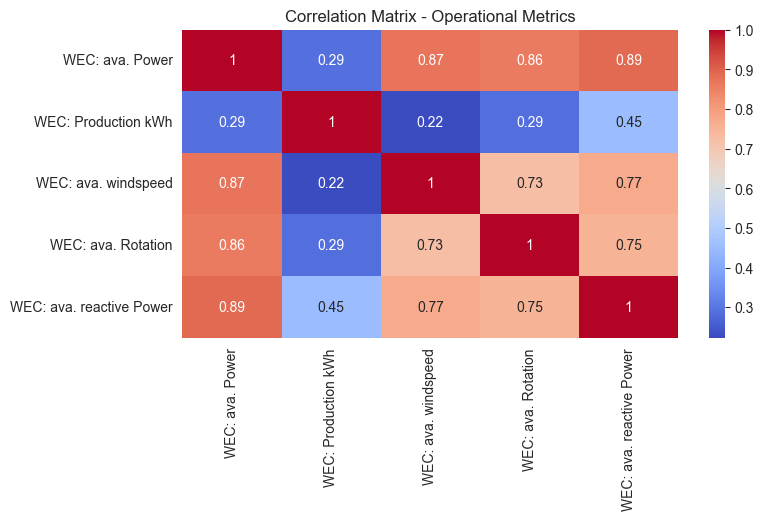

In [27]:
# Correlation matrix for key operational metrics
operational_cols = ['WEC: ava. Power', 'WEC: Production kWh', 'WEC: ava. windspeed', 
                    'WEC: ava. Rotation', 'WEC: ava. reactive Power']
plt.figure(figsize=(8, 4))
sns.heatmap(df[operational_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Operational Metrics')
plt.show()

In [28]:
# Summary statistics for selected columns
summary_cols = ['WEC: ava. Power', 'WEC: Production kWh', 'WEC: ava. windspeed', 
                'WEC: ava. Rotation', 'Ambient temp.']
df[summary_cols].describe()


,WEC: ava. Power,WEC: Production kWh,WEC: ava. windspeed,WEC: ava. Rotation,Ambient temp.
count,49027.000000,4.902700e+04,49027.000000,49027.00000,49027.000000
mean,942.261244,4.023194e+06,6.874626,8.67852,13.380219
std,1008.930159,2.364289e+06,3.694776,4.14345,5.246230
min,0.000000,0.000000e+00,0.000000,0.00000,0.000000
25%,87.000000,1.864514e+06,4.200000,6.33000,9.000000
50%,536.000000,3.384866e+06,6.500000,8.97000,13.000000
75%,1551.000000,6.099317e+06,8.900000,11.92000,17.000000
max,3071.000000,8.579750e+06,32.099998,14.73000,35.000000
